In [1]:
from ect import ECT, EmbeddedGraph, EmbeddedCW,create_example_graph

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import networkx as nx
import pandas as pd

/Users/liz/Library/CloudStorage/Dropbox/Math/Code/ect/ect/ect/ect_graph.py:10: SyntaxWarning: invalid escape sequence '\c'
  """
/Users/liz/Library/CloudStorage/Dropbox/Math/Code/ect/ect/ect/ect_graph.py:165: SyntaxWarning: invalid escape sequence '\o'
  """
/Users/liz/Library/CloudStorage/Dropbox/Math/Code/ect/ect/ect/ect_graph.py:222: SyntaxWarning: invalid escape sequence '\p'
  """
/Users/liz/Library/CloudStorage/Dropbox/Math/Code/ect/ect/ect/embed_graph.py:445: SyntaxWarning: invalid escape sequence '\i'
  """


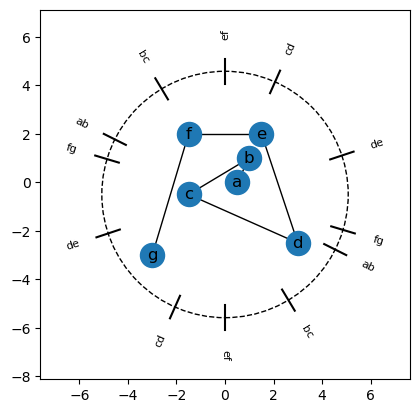

In [5]:
# Recreating the sprial example from Arya 

# Create the graph
Spiral = EmbeddedGraph()
Spiral.add_node('a', .5, 0)
Spiral.add_node('b', 1, 1)
Spiral.add_node('c', -1.5, -.5)
Spiral.add_node('d', 3, -2.5)
Spiral.add_node('e',1.5,2)
Spiral.add_node('f',-1.5,2)
Spiral.add_node('g', -3,-3)

nodelist = list(Spiral.nodes())
nodelist.sort()
for i in range(len(nodelist)-1):
    Spiral.add_edge(nodelist[i], nodelist[i+1])

fix, ax = plt.subplots()
Spiral.plot(ax = ax)
Spiral.plot_angle_circle(ax = ax, edges_only=True)

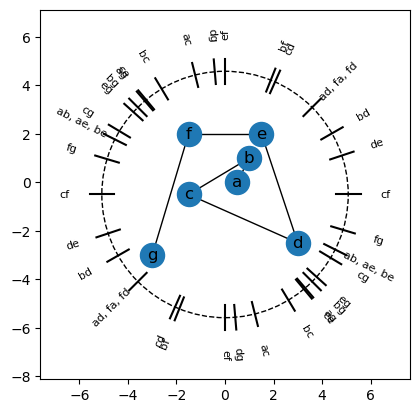

In [6]:
fix, ax = plt.subplots()
Spiral.plot(ax = ax)
Spiral.plot_angle_circle(ax = ax, edges_only=False)

In [8]:
All_Angles = Spiral.get_normals_dict(num_rounding_digits=2, opposites = True)
keys = list(All_Angles.keys())
keys.sort()

pd_table = pd.DataFrame(columns = ['Angle', 'Swapped Verts', 'Sorted list'])
pd_table['Angle'] = keys
pd_table['Swapped Verts'] = [All_Angles[key] for key in keys]



pd_table.sort_values(by='Angle', inplace=True)
pd_table['Sorted list'] = [''.join(Spiral.sort_vertices(key)) for key in keys]
pd_table.head(100)

,Angle,Swapped Verts,Sorted list
0,0.00,"[(c, f)]",gcfabed
1,0.32,"[(d, e)]",gcfabed
2,0.52,"[(b, d)]",gcfadbe
3,0.79,"[(a, d), (f, a), (f, d)]",gcdafbe
4,1.15,"[(c, d)]",gcdafbe
5,1.19,"[(b, f)]",gdcafbe
6,1.57,"[(e, f)]",gdcabfe
7,1.65,"[(d, g)]",gdcabef
8,1.82,"[(a, c)]",dgacbef
9,2.11,"[(b, c)]",dgacbef


In [9]:
All_Angles.keys()

dict_keys([5.82, 1.82, 3.93, 2.28, 2.11, 3.66, 1.19, 2.36, 4.29, 5.41, 0.0, 2.6, 0.32, 1.65, 1.57, 2.41, 2.85, 2.68, 4.96, 0.79, 5.42, 5.25, 0.52, 4.33, 5.5, 1.15, 2.27, 3.14, 5.74, 3.46, 4.79, 4.71, 5.55, 5.99])

In [11]:
All_Angles = Spiral.get_normals_dict( num_rounding_digits=2)

# add pi + angle for all angles 
All_Angles_2pi = {}
for key in All_Angles.keys():
    All_Angles_2pi[round(key,2)] = All_Angles[key]
    other_key = (key + np.pi) % 2*np.pi
    other_key = round(other_key, 2)
    All_Angles_2pi[other_key] = All_Angles[key]

keys = list(All_Angles_2pi.keys())
keys.sort()

pd_table = pd.DataFrame(columns=['angle', 'vertex_pair(s)_swapped', 'sorted_order_at_next_midpoint'])
pd_table['angle'] = keys
pd_table['vertex_pair(s)_swapped'] = [All_Angles_2pi[key] for key in keys]

# sort the vertex pairs at the midpoint

for i in range(len(keys)-1):
    angle = np.average([keys[i], keys[i+1]])
    sorted_order = Spiral.sort_vertices(angle)
    pd_table.at[i, 'sorted_order_at_next_midpoint'] = sorted_order

angle = np.average([keys[-1], keys[0]+2*np.pi])
sorted_order = Spiral.sort_vertices(angle)
pd_table.at[len(keys)-1, 'sorted_order_at_next_midpoint'] = sorted_order

pd_table

,angle,vertex_pair(s)_swapped,sorted_order_at_next_midpoint
0,0.00,"[(c, f)]","[g, c, f, a, b, e, d]"
1,0.32,"[(d, e)]","[g, c, f, a, d, b, e]"
2,1.04,"[(b, f)]","[g, c, d, a, f, b, e]"
3,1.19,"[(b, f)]","[g, d, c, a, b, f, e]"
4,1.57,"[(e, f)]","[g, d, c, a, b, e, f]"
5,1.65,"[(d, g)]","[d, g, c, a, b, e, f]"
6,1.73,"[(c, e)]","[d, g, c, a, b, e, f]"
7,1.82,"[(a, c)]","[d, g, a, c, b, e, f]"
8,2.11,"[(b, c)]","[d, g, a, b, c, e, f]"
9,2.24,"[(e, f)]","[d, g, a, b, c, e, f]"


In [6]:
nodelist

['a', 'b', 'c', 'd', 'e', 'f', 'g']

## Modified version breaking the spiral

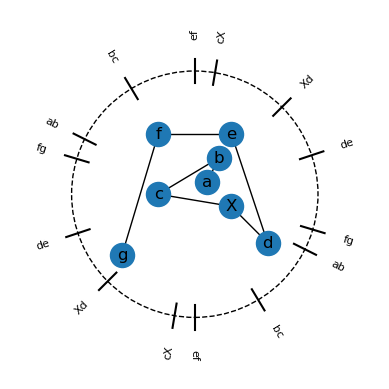

In [13]:
# Modified version with vertex added between C and D

# Create the graph
G = EmbeddedGraph()
G.add_node('a', .5, 0)
G.add_node('b', 1, 1)
G.add_node('c', -1.5, -.5)
G.add_node('X', 1.5, -1)
G.add_node('d', 3, -2.5)
G.add_node('e',1.5,2)
G.add_node('f',-1.5,2)
G.add_node('g', -3,-3)

nodelist = ['a', 'b', 'c','X',  'd', 'e', 'f', 'g']
for i in range(len(nodelist)-1):
    G.add_edge(nodelist[i], nodelist[i+1])

fig, ax = plt.subplots()
G.plot(ax = ax)
G.plot_angle_circle(ax = ax, edges_only=True)
# remove axes 
ax.set_axis_off()

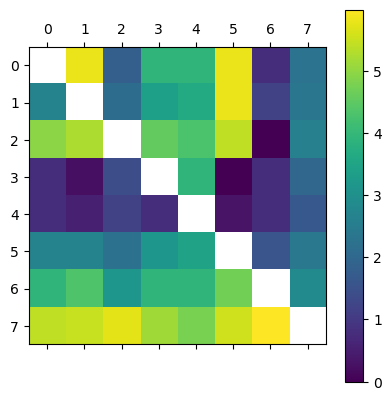

In [17]:
plt.matshow(G.get_all_normals_matrix()[0])
plt.colorbar()

In [19]:
All_Angles = G.get_normals_dict(num_rounding_digits=2, opposites = True)
keys = list(All_Angles.keys())
keys.sort()

pd_table = pd.DataFrame(columns = ['Angle', 'Swapped Verts', 'Sorted list'])
pd_table['Angle'] = keys
pd_table['Swapped Verts'] = [All_Angles[key] for key in keys]



pd_table.sort_values(by='Angle', inplace=True)
pd_table['Sorted list'] = [''.join(G.sort_vertices(key)) for key in keys]
pd_table.head(100)

,Angle,Swapped Verts,Sorted list
0,0.00,"[(c, f), (X, e)]",gcfabXed
1,0.25,"[(b, X)]",gcfaXbed
2,0.32,"[(d, e)]",gcfaXbed
3,0.52,"[(b, d)]",gcfaXdbe
4,0.79,"[(a, X), (a, d), (f, a), (X, d), (f, X), (f, d)]",gcdXafbe
5,1.15,"[(c, d)]",gcdXafbe
6,1.19,"[(b, f)]",gdcXafbe
7,1.41,"[(c, X)]",gdXcabfe
8,1.57,"[(e, f)]",gdXcabfe
9,1.65,"[(d, g)]",gdXcabef


## Simplified version from Arya paper 

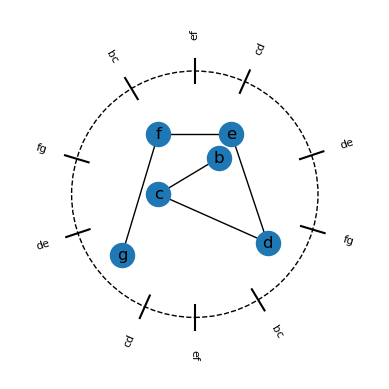

In [21]:
# Recreating the sprial example from Arya 

# Create the graph
Spiral2 = EmbeddedGraph()
# Spiral2.add_node('a', .5, 0)
Spiral2.add_node('b', 1, 1)
Spiral2.add_node('c', -1.5, -.5)
Spiral2.add_node('d', 3, -2.5)
Spiral2.add_node('e',1.5,2)
Spiral2.add_node('f',-1.5,2)
Spiral2.add_node('g', -3,-3)

nodelist = list(Spiral2.nodes())
nodelist.sort()
for i in range(len(nodelist)-1):
    Spiral2.add_edge(nodelist[i], nodelist[i+1])

fig,ax = plt.subplots()
Spiral2.plot(ax = ax)
Spiral2.plot_angle_circle(ax = ax, edges_only=True)
# remove axes 
ax.set_axis_off()




In [22]:
All_Angles = Spiral2.get_normals_dict(num_rounding_digits=2, opposites = True)
keys = list(All_Angles.keys())
keys.sort()

pd_table = pd.DataFrame(columns = ['Angle', 'Swapped Verts', 'Sorted list'])
pd_table['Angle'] = keys
pd_table['Swapped Verts'] = [All_Angles[key] for key in keys]



pd_table.sort_values(by='Angle', inplace=True)
pd_table['Sorted list'] = [''.join(Spiral2.sort_vertices(key)) for key in keys]
pd_table.head(100)

,Angle,Swapped Verts,Sorted list
0,0.00,"[(c, f)]",gcfbed
1,0.32,"[(d, e)]",gcfbed
2,0.52,"[(b, d)]",gcfdbe
3,0.79,"[(d, f)]",gcdfbe
4,1.15,"[(c, d)]",gcdfbe
5,1.19,"[(b, f)]",gdcfbe
6,1.57,"[(e, f)]",gdcbfe
7,1.65,"[(d, g)]",gdcbef
8,2.11,"[(b, c)]",dgcbef
9,2.27,"[(c, e)]",dgbecf


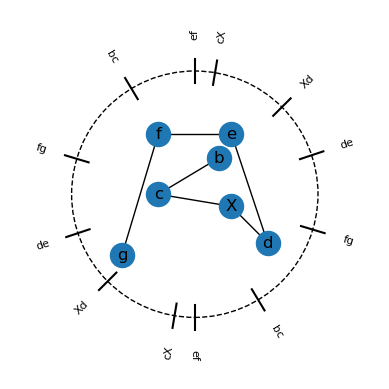

In [23]:
# Modified version with vertex added between C and D

# Create the graph
G = EmbeddedGraph()
# G.add_node('a', .5, 0)
G.add_node('b', 1, 1)
G.add_node('c', -1.5, -.5)
G.add_node('X', 1.5, -1)
G.add_node('d', 3, -2.5)
G.add_node('e',1.5,2)
G.add_node('f',-1.5,2)
G.add_node('g', -3,-3)

nodelist = ['b', 'c','X',  'd', 'e', 'f', 'g']
for i in range(len(nodelist)-1):
    G.add_edge(nodelist[i], nodelist[i+1])

fig, ax = plt.subplots()
G.plot(ax = ax)
G.plot_angle_circle(ax = ax, edges_only=True)
# remove axes 
ax.set_axis_off()

In [25]:
All_Angles = G.get_normals_dict(num_rounding_digits=2, opposites = True)
keys = list(All_Angles.keys())
keys.sort()

pd_table = pd.DataFrame(columns = ['Angle', 'Swapped Verts', 'Sorted list'])
pd_table['Angle'] = keys
pd_table['Swapped Verts'] = [All_Angles[key] for key in keys]



pd_table.sort_values(by='Angle', inplace=True)
pd_table['Sorted list'] = [''.join(Spiral2.sort_vertices(key)) for key in keys]
pd_table.head(100)

,Angle,Swapped Verts,Sorted list
0,0.00,"[(c, f), (X, e)]",gcfbed
1,0.25,"[(b, X)]",gcfbed
2,0.32,"[(d, e)]",gcfbed
3,0.52,"[(b, d)]",gcfdbe
4,0.79,"[(X, d), (f, X), (f, d)]",gcdfbe
5,1.15,"[(c, d)]",gcdfbe
6,1.19,"[(b, f)]",gdcfbe
7,1.41,"[(c, X)]",gdcbfe
8,1.57,"[(e, f)]",gdcbfe
9,1.65,"[(d, g)]",gdcbef
